--2025-08-06 08:54:11--  https://github.com/joolsa/fake_real_news_dataset/raw/master/fake_or_real_news.csv.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/joolsa/fake_real_news_dataset/master/fake_or_real_news.csv.zip [following]
--2025-08-06 08:54:12--  https://raw.githubusercontent.com/joolsa/fake_real_news_dataset/master/fake_or_real_news.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11878108 (11M) [application/zip]
Saving to: ‘fake_real_news.zip’

fake_real_news.zip  100%[===================>]  11.33M  --.-KB/s    in 0.09s   

2025-08-06 08:54:12 (125 MB/s) - ‘fake_real_news.zi

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6166 - loss: 0.6653 - val_accuracy: 0.7585 - val_loss: 0.5340
Epoch 2/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7989 - loss: 0.4987 - val_accuracy: 0.8564 - val_loss: 0.3564
Epoch 3/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8586 - loss: 0.3484 - val_accuracy: 0.8887 - val_loss: 0.2997
Epoch 4/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8947 - loss: 0.2663 - val_accuracy: 0.8903 - val_loss: 0.2525
Epoch 5/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9092 - loss: 0.2225 - val_accuracy: 0.8824 - val_loss: 0.2376
Epoch 6/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9217 - loss: 0.1920 - val_accuracy: 0.9006 - val_loss: 0.2219
Epoch 7/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9290 - loss: 0.1645 - val_accuracy: 0.9211 - val_loss: 0.2084
Epoch 8/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9540 - loss: 0.1283 - val_accuracy: 0.

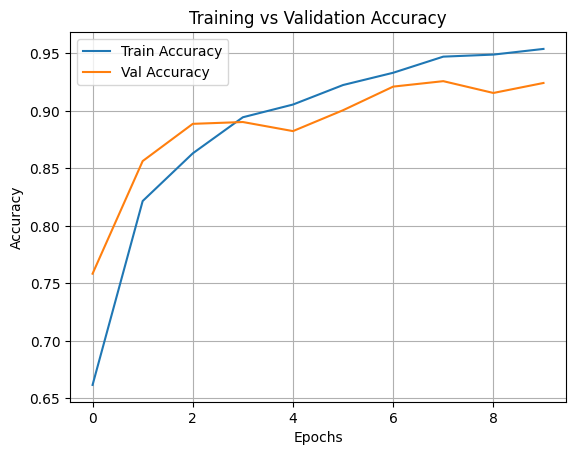

In [5]:
# Step 1: Installing necessary libraries
!pip install scikit-learn tensorflow

# Step 2: Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 3: Downloading and unzip dataset
!wget -O fake_real_news.zip https://github.com/joolsa/fake_real_news_dataset/raw/master/fake_or_real_news.csv.zip
!unzip -o fake_real_news.zip

# Step 4: Loading dataset
if os.path.exists("fake_or_real_news.csv"):
    df = pd.read_csv("fake_or_real_news.csv")
    print("Loaded dataset — first rows:")
    print(df.head())
else:
    raise FileNotFoundError("Dataset file not found after unzipping")

# Step 5: labels and text
# Assume CSV has columns: label and text
texts = df['text'].fillna('').values
labels = np.array([1 if str(lbl).strip().lower() == 'real' else 0 for lbl in df['label']])

# Step 6: Tokenize and pad
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=500, truncating='post')

X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

# Step 7: Build model
model = Sequential([
    Embedding(10000, 16, input_length=500),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Step 8: Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 9: Evaluate model
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")

# Step 10: Classification report & confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 11: Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
